# Fe80Ni20 data source

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Provenance

Data source: *Massively parallel atomistic simulation of ultrafast thermal spin dynamics of a permalloy vortex*,
 Daniel Meilak, Sarah Jenkins, Rory Pond, and Richard F. L. Evans,
Department of Physics, The University of York, York, YO10 5DD, UK (2019), https://arxiv.org/abs/1908.08885

The associated data files [input](input), [output.txt](output.txt), [Pymat.txt](Pymat.txt) and [MvsT.gpl](MvsT.gpl) were kindly provided by Richard Evans.

# Processing

Convert data into mammos-spindynamics.db format.

In [2]:
data = pd.read_csv("output.txt", comment="#", sep=r"\t", header=None, engine='python')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,2.000000e-11,0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.000000,0.000000
1,4.000000e-11,10,-0.000449,-0.001741,0.999998,0.999759,-0.000381,-0.001705,0.999998,0.999756,...,0.005314,3.993890e-08,1.441520e-08,0.002663,0.006300,5.210560e-08,2.439170e-08,0.005423,0.004677,0.002243
2,6.000000e-11,20,0.007115,0.000048,0.999975,0.999248,0.007548,0.000231,0.999971,0.999245,...,0.004009,1.794690e-07,7.463850e-08,0.012092,0.004518,2.476640e-07,1.322360e-07,0.013040,0.010932,0.005546
3,8.000000e-11,30,0.018003,0.014082,0.999739,0.998554,0.017370,0.014469,0.999744,0.998548,...,0.004506,3.203870e-06,1.603230e-07,0.008005,0.005450,3.718350e-06,2.818210e-07,0.021603,0.018624,0.008663
4,1.000000e-10,40,0.030487,0.017969,0.999374,0.997645,0.030556,0.018661,0.999359,0.997658,...,0.009775,9.720060e-06,3.235340e-07,0.011421,0.011051,1.142050e-05,5.995970e-07,0.031482,0.026493,0.013582


Inferred from the gnuplot script:

- column 1 is temperature
- column 5 is Ms for Fe
- column 9 is Ms for Ni

<Axes: xlabel='1'>

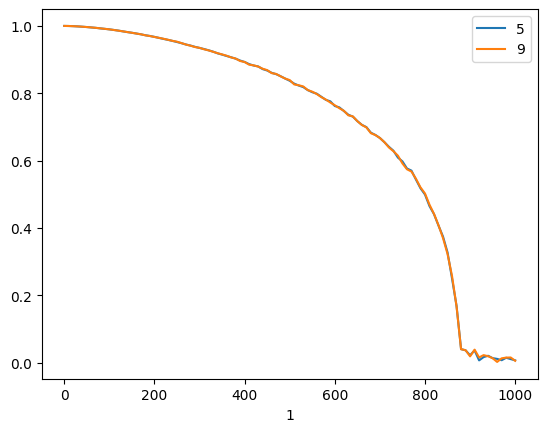

In [3]:
data.plot(x=1, y=[5, 9])

Is there any significant difference between the Fe and Ni data?

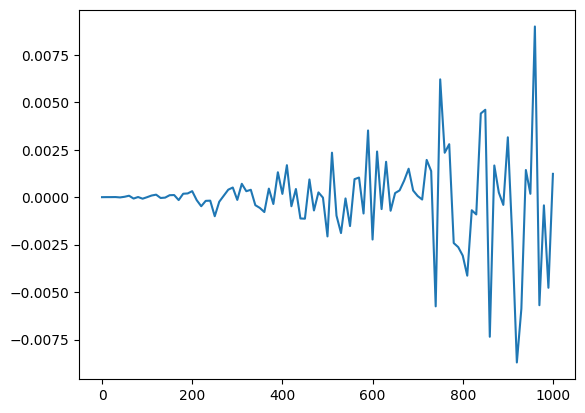

In [4]:
plt.plot(data[1], data[5] - data[9])

We use temperature-dependence for Fe (at T=0 this is 1).

We need to establish Ms(T=0).

In [5]:
import mammos_units as u

Magnetic moments from the paper https://arxiv.org/pdf/1908.08885, also in [Pymat.txt](Pymat.txt).

In [6]:
# Permalloy is FCC structure, with randomly distributed Ni and Fe in ratio 20:80
fu_per_fcc_unit_cell = 4  # 4 basis points in each fcc-cell

m_fe = 2.9 * u.mu_B
fraction_fe = 0.2  # 20%
m_ni = 0.62 * u.mu_B
fraction_ni = 0.8  # 80% 
# Effective magnetic moment per formula unit
magnetic_moment_per_fu = (m_fe * fraction_fe + m_ni * fraction_ni) / u.fu

# volume occupied per formula unit
vol_per_fu = (3.55 * u.Angstrom) ** 3 / fu_per_fcc_unit_cell / u.fu

# magnetisation is magnetic moment per volume
magnetization = magnetic_moment_per_fu / vol_per_fu
Ms0 = magnetization.si  # force conversion from muB to si base units
Ms0

<Quantity 892184.69121101 A / m>

Pick the Fe data (normalised to be 1 at $T=0$):

In [7]:
sel = data[[1,5]]

Multiply with the Ms(T=0):

In [8]:
sel.loc[:, 5] *= Ms0

Write as table to disk

In [9]:
sel.columns = ["T[K]", "M[A/m]"]
sel = sel.set_index("T[K]")

In [10]:
sel

,M[A/m]
T[K],
0,892184.691211
10,891969.674700
20,891513.768323
30,890894.592148
40,890083.596263
...,...
960,10183.931376
970,6629.182067
980,13175.694301


In [11]:
# what is Ms at T=300K?
sel['M[A/m]'][300]

np.float64(833918.7855820971)

In [12]:
sel.to_csv("M.csv")

In [13]:
!head M.csv

T[K],M[A/m]
0,892184.6912110149
10,891969.6747004329
20,891513.7683232242
30,890894.5921475238
40,890083.596263213
50,889199.4412342228
60,888171.6444699477
70,887053.7370518603
80,885671.7429651745
